In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load the IMDB dataset
max_words = 10000  # Number of words to consider as features
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_words)

In [3]:
# Pad sequences to ensure uniform input size
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=200)

In [4]:
# Build the ANN model
def create_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=max_words, output_dim=128, input_length=200),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Train the model
def train_model(model):
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
    return history

In [6]:
# Evaluate the model
def evaluate_model(model):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc}")
    return test_loss, test_acc

In [7]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.show()

In [8]:
# Save the model
def save_model(model, filename):
    model.save(filename)
    print(f"Model saved to {filename}")

In [9]:
# Load the model
def load_model(filename):
    model = keras.models.load_model(filename)
    print(f"Model loaded from {filename}")
    return model

In [10]:
# Make predictions
def make_predictions(model, x_test):
    predictions = model.predict(x_test)
    return predictions

In [11]:
# Visualize predictions
def visualize_predictions(predictions, x_test, y_test, num_samples=5):
    for i in range(num_samples):
        print(f"Review {i + 1}")
        print("Prediction:", "Positive" if predictions[i] > 0.5 else "Negative")
        print("Actual:", "Positive" if y_test[i] == 1 else "Negative")
        print("")

Epoch 1/5


d:\anaconda\envs\myLLM\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.6764 - loss: 0.5494 - val_accuracy: 0.8632 - val_loss: 0.3448
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9712 - loss: 0.0904 - val_accuracy: 0.8438 - val_loss: 0.4220
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9966 - loss: 0.0131 - val_accuracy: 0.8372 - val_loss: 0.5783
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.8398 - val_loss: 0.5942
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 1.0000 - loss: 2.4692e-04 - val_accuracy: 0.8430 - val_loss: 0.6081
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8441 - loss: 0.6179
Test accuracy: 0.8443199992179871


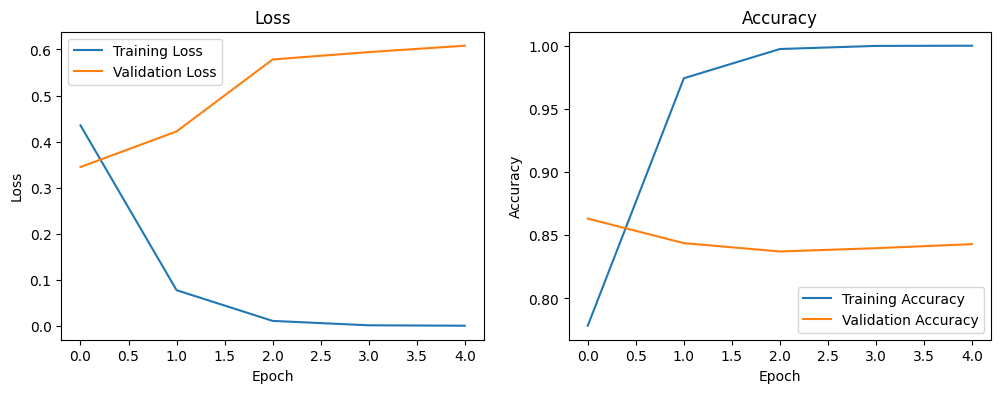

Model saved to ann_imdb_model.h5
Model loaded from ann_imdb_model.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Review 1
Prediction: Negative
Actual: Negative

Review 2
Prediction: Positive
Actual: Positive

Review 3
Prediction: Positive
Actual: Positive

Review 4
Prediction: Negative
Actual: Negative

Review 5
Prediction: Positive
Actual: Positive



In [12]:
# Main execution
if __name__ == "__main__":
    model = create_model()
    history = train_model(model)
    evaluate_model(model)
    plot_history(history)

    # Save the model
    save_model_filename = "ann_imdb_model.h5"
    save_model(model, save_model_filename)

    # Load the model
    loaded_model = load_model(save_model_filename)

    # Make predictions
    predictions = make_predictions(loaded_model, x_test)

    # Visualize predictions
    visualize_predictions(predictions, x_test, y_test)